In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('sensor_data_sample.csv')
df.head()


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity
0,0.996714,0.161736,1.347689,1.723030,0.065847,-0.134137,Walking
1,2.079213,1.067435,0.230526,0.742560,-0.163418,-0.365730,Walking
2,0.741962,-1.613280,-1.024918,-0.362288,-0.712831,0.414247,Walking
3,-0.408024,-1.112304,2.165649,-0.025776,0.367528,-1.324748,Walking
4,-0.044383,0.410923,-0.450994,0.575698,-0.300639,-0.191694,Walking


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   acc_x     300 non-null    float64
 1   acc_y     300 non-null    float64
 2   acc_z     300 non-null    float64
 3   gyro_x    300 non-null    float64
 4   gyro_y    300 non-null    float64
 5   gyro_z    300 non-null    float64
 6   activity  300 non-null    object 
dtypes: float64(6), object(1)
memory usage: 16.5+ KB
None


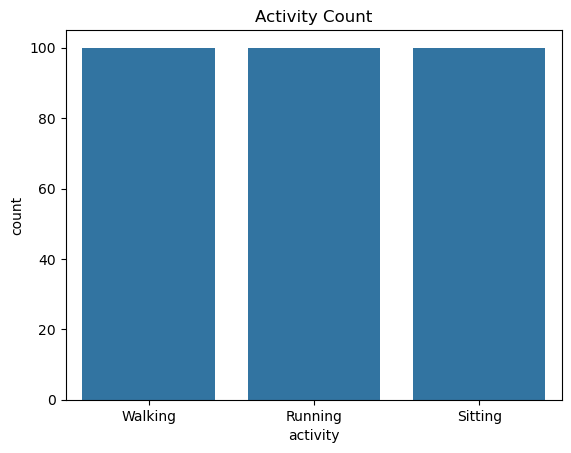

In [2]:
# Check column names and datatypes
print(df.info())

# Check activity distribution
sns.countplot(data=df, x='activity')
plt.title("Activity Count")
plt.show()


In [3]:
# Rolling window size
window_size = 10

# Create rolling features
feature_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']
X = pd.DataFrame()

for col in feature_cols:
    X[f'{col}_mean'] = df[col].rolling(window=window_size).mean()
    X[f'{col}_std'] = df[col].rolling(window=window_size).std()
    X[f'{col}_min'] = df[col].rolling(window=window_size).min()
    X[f'{col}_max'] = df[col].rolling(window=window_size).max()

# Remove NaN rows due to rolling
X = X.dropna().reset_index(drop=True)

# Align target labels
y = df['activity'][window_size - 1:].reset_index(drop=True)


In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

     Running       1.00      1.00      1.00        20
     Sitting       1.00      1.00      1.00        18
     Walking       1.00      1.00      1.00        21

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



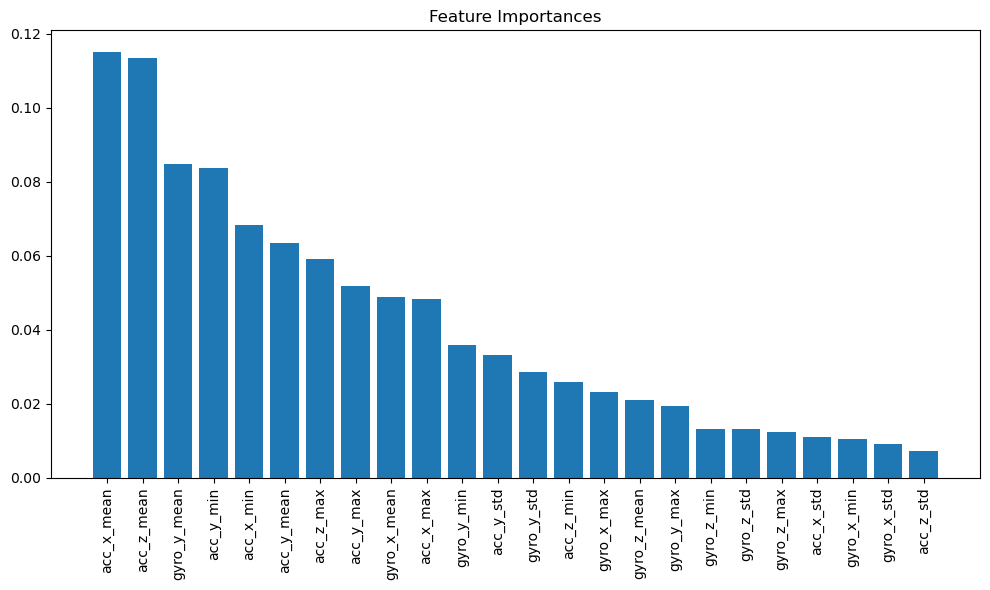

In [6]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()
